# 1. Data Preprocessing

# (1) Reading the Training, the Development and the Testing Datasets 

In [1]:
import pandas as pd
from os import listdir

import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory1 = 'data/train'
paths1 = listdir(directory1)
paths1.sort()
paths1

['anger-ratings-0to1.train.txt',
 'fear-ratings-0to1.train.txt',
 'joy-ratings-0to1.train.txt',
 'sadness-ratings-0to1.train.txt']

In [3]:
## Define the path of training dataset
#path1 = paths1[3]

In [4]:
# If you want to restore x_train vectors, y_train_vectors, x_test_vectors, y_test_vectors: you can change the 'emotion' here 
# and then restore those vectors

emotion = "whole"
emotion

'whole'

In [5]:
train_clean = pd.read_csv("train_clean.csv")

test_clean = pd.read_csv("test_clean.csv")

In [6]:
train_clean

,Unnamed: 0,SentID,Tweet,Emotion,Rating
0,0,10000,how fuck who heck moved fridge i knock landlor...,anger,0.938
1,1,10001,so indian uber driver called someone n word if...,anger,0.896
2,2,10002,<user> i asked parcel delivered pick store add...,anger,0.896
3,3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896
4,4,10004,do join <user> put phone talk rude taking mone...,anger,0.896
...,...,...,...,...,...
3955,3955,40855,common app randomly logged i writing last part...,sadness,0.833
3956,3956,40856,i would rather laugh rarest genius beautiful a...,sadness,0.688
3957,3957,40857,if invest new film i stop asking invest new fi...,sadness,0.458
3958,3958,40858,just watched django unchained other people may...,sadness,0.333


In [7]:
train = train_clean
train

,Unnamed: 0,SentID,Tweet,Emotion,Rating
0,0,10000,how fuck who heck moved fridge i knock landlor...,anger,0.938
1,1,10001,so indian uber driver called someone n word if...,anger,0.896
2,2,10002,<user> i asked parcel delivered pick store add...,anger,0.896
3,3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896
4,4,10004,do join <user> put phone talk rude taking mone...,anger,0.896
...,...,...,...,...,...
3955,3955,40855,common app randomly logged i writing last part...,sadness,0.833
3956,3956,40856,i would rather laugh rarest genius beautiful a...,sadness,0.688
3957,3957,40857,if invest new film i stop asking invest new fi...,sadness,0.458
3958,3958,40858,just watched django unchained other people may...,sadness,0.333


In [8]:
test = test_clean
test

,Unnamed: 0,SentID,Tweet,Emotion,Rating
0,0,10941,at point today someone says something remotely...,anger,0.319
1,1,10942,<user> it s game day t minus <number> <number>...,anger,0.144
2,2,10943,this game pissed game year my blood boiling ti...,anger,0.898
3,3,10944,<user> i found candice candace she pout likes 😍,anger,0.271
4,4,10945,<user> <user> <user> <user> come mum <number> ...,anger,0.646
...,...,...,...,...,...
3137,3137,41528,why candice constantly pout gb bo,sadness,0.396
3138,3138,41529,<user> unhappy redbus cc i talked week still i...,sadness,0.604
3139,3139,41530,<user> pull a few weeks ago sadly theres game ...,sadness,0.479
3140,3140,41531,i buying art supplies i debating serious buy a...,sadness,0.375


In [9]:
train_tweets = list(train['Tweet'])
train_intensities = list(train['Rating'])
train_tweets[:10]

['how fuck who heck moved fridge i knock landlord door angry mad',
 'so indian uber driver called someone n word if i moving vehicle i would jumped disgusted',
 '<user> i asked parcel delivered pick store address fuming poor customer service',
 'ef whichever butt wipe pulled fire alarm davis bc i sound asleep pissed angry upset tired sad tired h angry',
 'do join <user> put phone talk rude taking money acc willy nilly fuming',
 'my blood boiling',
 'when still got whole season wentworth watch stupid cunt work ruins us <user> raging old cunt',
 '<user> tracking show equipment delivered why service suddenly delayed we already <number> weeks fuming',
 '<user> legit furious people fucking idiots',
 'how suppose work wtf dude thanks pissing']

In [10]:
train_intensities[:10]

[0.938,
 0.8959999999999999,
 0.8959999999999999,
 0.8959999999999999,
 0.8959999999999999,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875]

In [11]:
test_tweets = list(test['Tweet'])
test_intensities = list(test['Rating'])

In [12]:
# show the distribution of text length (from below: there is no need to truncate any of texts)
def show_text_len(train):
    train["text_len"] = train['Tweet'].map(lambda x: len(x.split()))
    return train["text_len"]

In [13]:
# show Max Text Length of All Datasets for comparsion

all_tweets_max_len = pd.DataFrame(np.array([max(show_text_len(train)), max(show_text_len(test))]))

all_tweets_max_len.index = ['train', 'test']
all_tweets_max_len.columns = ['max text length']

all_tweets_max_len

,max text length
train,32
test,31


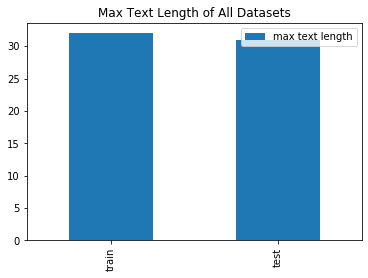

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
all_tweets_max_len.plot(kind='bar')
plt.title('Max Text Length of All Datasets')
plt.show()

In [15]:
'''
we set the length to which each tweet vector will be zero padded to.
this is based on the maximum length we got on the training set - we do not want to remove
any words as the maximun length of the training set is not very big.
'''

max_len = max(show_text_len(train))
max_len

32

# 2. Text Data Preparation（Feature Extraction)

# (1) Load Pre-trained Word Vectors

In [16]:
import numpy as np
import gensim
from nltk import word_tokenize

In [17]:
word_vector_path = "files/wv_models/"

# 1) Glove

In [18]:
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r', encoding = 'UTF-8')
    model = {}
    num = 1
    for line in f:
        try:
            splitLine = line.split()
            word = splitLine[0]
            coefs = np.asarray(splitLine[1:], dtype = 'float32')
            model[word] = coefs
            num += 1
        except Exception as e:
            print("Failed at line " + str(num))
    print("Done. Found %s word vectors." %len(model)," words loaded!")
    return model

In [19]:
# To download the pretrained glove model (2B tweets, 27B tokens) - [https://nlp.stanford.edu/projects/glove/   glove.twitter.27B.zip]
# choose glove.twitter.27B.200d.txt from glove.twitter.27B.zip. [200-dimension vectors]

wv_model_path1 = word_vector_path + "glove.twitter.27B.200d.txt"
 
wv_model_g = loadGloveModel(wv_model_path1)


Loading Glove Model
Done. Found 1193514 word vectors.  words loaded!


# 2) Word2Vec

In [20]:
# To download the pretrained word2vec model  - [https://github.com/FredericGodin/TwitterEmbeddings]

wv_model_path2 = word_vector_path + "word2vec_twitter_tokens.bin"
wv_model_w = gensim.models.KeyedVectors.load_word2vec_format(wv_model_path2, binary=True, unicode_errors='ignore')

In [21]:
words = list(wv_model_w.wv.vocab)
print('Word Vectors: %d' % len(words))

Word Vectors: 3039345


C:\Users\dell\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


# 3) Define Averaged Word Embeddings

In [22]:
w2v_dimensions_g = len(wv_model_g['word'])
w2v_dimensions_w = len(wv_model_w['word'])

In [23]:
print(w2v_dimensions_g,w2v_dimensions_w)

200 400


In [24]:
def get_word_embeddings(word, model, dimensions):
    vec_rep = np.zeros(dimensions)
    if word in model:
        vec_rep = model[word]
    return vec_rep

# (2) Load Lexicon Feature Vectors

In [25]:
import json
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize

lexicons_path = "files/lexicons/"

In [26]:
paths2 = listdir(lexicons_path)
paths2.sort()
paths2

['0.Emoji_Vectors',
 '1.NRC-Emotion-Intensity-Lexicon',
 '3.NRC-Emotion-Lexicon',
 '4.NRC-Hashtag-Emotion-Lexicon',
 '5.NRC-Emoticon-Lexicon',
 '6.NRC-Emoticon-AffLexNegLex',
 '7.NRC-Hashtag-Sentiment-AffLexNegLex',
 '8.NRC-Hashtag-Sentiment-Lexicon',
 '9.DepecheMood_V1.0']

In [27]:
non_linear_factor = PolynomialFeatures(3)

In [28]:
import re
from nltk.corpus import stopwords
from nltk import bigrams
# prepare for clean Hashtag Emotion Intensity Lexicons...

def remove_stopwords(string):
    split_string = \
        [word for word in string.split()
         if word not in stopwords.words('english')]
    
    return " ".join(split_string)

def clean_str(string):  
    string = string.replace("\\n", " ")
    string = string.replace("_NEG", "")
    string = string.replace("_NEGFIRST", "")
    string = re.sub(r"@[A-Za-z0-9_(),!?\'\`]+", " ", string) # removing any twitter handle mentions
    string = re.sub(r"\d+", " ", string) # removing any words with numbers
    string = re.sub(r"_", " ", string)
    string = re.sub(r":", " ", string)
    string = re.sub(r"/", " ", string)
    string = re.sub(r"#", " ", string)
    string = re.sub(r"\.", " ", string)
    string = re.sub(r"\*", " ", string)
    string = re.sub(r"\'s", " ", string)
    string = re.sub(r"\'m", " am", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"n\’t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\’re", " are", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\’d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\’ll", " will", string)
    string = re.sub(r"'", " ", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " !", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", " ?", string)
    string = re.sub(r"-", " ", string)
    string = re.sub(r"<", " ", string)
    string = re.sub(r">", " ", string)
    string = re.sub(r";", " ", string)
    string = re.sub(r"\s{2,}", " ", string)

    return remove_stopwords(string.strip().lower())

# 1) Emoji Vectors

In [29]:
with open(('%s%s/' %(lexicons_path, paths2[0])) + listdir('%s%s/' %(lexicons_path, paths2[0]))[0], encoding = 'UTF-8') \
as emoji_file:
    emoji_list = json.load(emoji_file)
    
emoji_dict = dict()
for emoji in emoji_list:
    emoji_dict[emoji["emoji"]] = (emoji["name"], emoji["polarity"])

In [30]:
# do a sanity check
print(emoji_dict["😂"])

('joy', 3)


In [31]:

def get_emoji_intensity(word):
    score = 0.0
    if word in emoji_dict.keys():
        score = float(emoji_dict[word][1])
    vec_rep = np.array([score])
    return non_linear_factor.fit_transform([vec_rep])[0]
#non_linear_factor.fit_transform([vec_rep])[0]

In [32]:
# do a sanity check
get_emoji_intensity("😂")

array([ 1.,  3.,  9., 27.])

# 2) Emotion Intensity Lexicon

In [33]:
affect_intensity_file_path = ('%s%s/' %(lexicons_path, paths2[1])) + listdir('%s%s/' %(lexicons_path, paths2[1]))[0]

def get_word_affect_intensity_dict(emotion):
    word_intensities = dict()

    with open(affect_intensity_file_path) as affect_intensity_file:
        for line in affect_intensity_file:
            word_int_array = line.replace("\n", "").split("\t")

            if (word_int_array[1] == emotion):
                word_intensities[word_int_array[0]] = float(word_int_array[2])

    return word_intensities

In [34]:
word_intensities = get_word_affect_intensity_dict(emotion)
word_intensities

{}

In [35]:
def get_emo_int_vector(word):
    score = 0.0
    if word in word_intensities.keys():
        score = float(word_intensities[word])
    vec_rep = np.array([score])
    return non_linear_factor.fit_transform([vec_rep])[0]

In [36]:
get_emo_int_vector("furious")

array([1., 0., 0., 0.])

# 3) SentiWordNet

In [37]:
from nltk.corpus import sentiwordnet as swn

In [38]:
def get_sentiwordnetscore(word):
    
    vec_rep = np.zeros(2)
    
    synsetlist = list(swn.senti_synsets(word))

    if synsetlist:
        vec_rep[0] = synsetlist[0].pos_score()
        vec_rep[1] = synsetlist[0].neg_score()

    return non_linear_factor.fit_transform([vec_rep])[0]

In [39]:
get_sentiwordnetscore("fury")

array([1.      , 0.25    , 0.5     , 0.0625  , 0.125   , 0.25    ,
       0.015625, 0.03125 , 0.0625  , 0.125   ])

# 4) Sentiment Emotion Presence Lexicon

In [40]:
sentiment_emotion_lex_file_path = ('%s%s/' %(lexicons_path, paths2[2])) + listdir('%s%s/' %(lexicons_path, paths2[2]))[0]

def get_affect_presence_list(emotion):
    word_list = list()
    
    with open(sentiment_emotion_lex_file_path) as sentiment_emotion_lex_file:
        lines = sentiment_emotion_lex_file.readlines()[1:] 
        for line in lines:
            word_array = line.replace("\n", "").split("\t")

            if (word_array[1] == emotion and word_array[2] == '1'):
                word_list.append(word_array[0])
                
    return word_list

In [41]:
word_list = get_affect_presence_list(emotion)
word_list

[]

In [42]:
def get_sentiment_emotion_feature(word):
    score = 0.0
    if word in word_list:
        score = 1.0
    vec_rep = np.array([score])
    return non_linear_factor.fit_transform([vec_rep])[0]

In [43]:
get_sentiment_emotion_feature("fury")

array([1., 0., 0., 0.])

# 5) Hashtag Emotion Intensity

In [44]:
hashtag_emotion_lex_file_path = ('%s%s/' %(lexicons_path, paths2[3])) + listdir('%s%s/' %(lexicons_path, paths2[3]))[0]
    
def get_hashtag_emotion_intensity(emotion):
    hastag_intensities = dict()
    
    with open(hashtag_emotion_lex_file_path) as hashtag_emotion_lex_file:
        for line in hashtag_emotion_lex_file:
            word_array = line.replace("\n", "").split("\t")
            
            if (word_array[0] == emotion):
                hastag_intensities[word_array[1]] = float(word_array[2])

    return hastag_intensities

In [45]:
hashtag_emotion_intensities = get_hashtag_emotion_intensity(emotion)

In [46]:

def get_hashtag_emotion_vector(word):
    score = 0.0
    if word in hashtag_emotion_intensities.keys():
        score = float(hashtag_emotion_intensities[word])
    vec_rep = np.array([score])
    return non_linear_factor.fit_transform([vec_rep])[0]

In [47]:
get_hashtag_emotion_vector("furious")

array([1., 0., 0., 0.])

# 6) Emoticon Sentiment Lexicon¶

In [48]:
listdir('%s%s/' %(lexicons_path, paths2[4]))

['bigrams-pmilexicon.txt', 'pairs-pmilexicon.txt', 'unigrams-pmilexicon.txt']

In [49]:
emoticon_lexicon_unigrams_file_path = ('%s%s/' %(lexicons_path, paths2[4])) + listdir('%s%s/' %(lexicons_path, paths2[4]))[2]
emoticon_lexicon_bigrams_file_path = ('%s%s/' %(lexicons_path, paths2[4])) + listdir('%s%s/' %(lexicons_path, paths2[4]))[0]
emoticon_lexicon_pairs_file_path = ('%s%s/' %(lexicons_path, paths2[4])) + listdir('%s%s/' %(lexicons_path, paths2[4]))[1]
pair_split_string = "---"
    
def get_emoticon_lexicon_unigram_dict():
    emoticon_lexicon_unigrams = dict()
    with open(emoticon_lexicon_unigrams_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            emoticon_lexicon_unigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return emoticon_lexicon_unigrams

def get_emoticon_lexicon_bigram_dict():
    emoticon_lexicon_bigrams = dict()
    with open(emoticon_lexicon_bigrams_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            emoticon_lexicon_bigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return emoticon_lexicon_bigrams


In [50]:
emoticon_lexicon_unigram_dict = get_emoticon_lexicon_unigram_dict()

In [51]:
emoticon_lexicon_bigram_dict = get_emoticon_lexicon_bigram_dict()

In [52]:
#emoticon_lexicon_pairs_dict = get_emoticon_lexicon_pairs_dict()

In [53]:

def get_unigram_sentiment_emoticon_lexicon_vector(word):
    vec_rep = np.zeros(3)
    if word in emoticon_lexicon_unigram_dict.keys():
        vec_rep = emoticon_lexicon_unigram_dict[word]
        
#     return vector_list
    return non_linear_factor.fit_transform([vec_rep])[0]

def get_bigram_sentiment_emoticon_lexicon_vector(word):
    vec_rep = np.zeros(3)
    if word in emoticon_lexicon_bigram_dict.keys():
        vec_rep = emoticon_lexicon_bigram_dict[word]
    return non_linear_factor.fit_transform([vec_rep])[0]


In [54]:
get_unigram_sentiment_emoticon_lexicon_vector('fury')

array([ 1.00000e+00, -6.20000e-02,  1.70000e+01,  1.90000e+01,
        3.84400e-03, -1.05400e+00, -1.17800e+00,  2.89000e+02,
        3.23000e+02,  3.61000e+02, -2.38328e-04,  6.53480e-02,
        7.30360e-02, -1.79180e+01, -2.00260e+01, -2.23820e+01,
        4.91300e+03,  5.49100e+03,  6.13700e+03,  6.85900e+03])

In [55]:
get_bigram_sentiment_emoticon_lexicon_vector('add everyone')

array([1.00000000e+00, 7.35200000e+00, 1.48500000e+03, 1.00000000e+00,
       5.40519040e+01, 1.09177200e+04, 7.35200000e+00, 2.20522500e+06,
       1.48500000e+03, 1.00000000e+00, 3.97389598e+02, 8.02670774e+04,
       5.40519040e+01, 1.62128142e+07, 1.09177200e+04, 7.35200000e+00,
       3.27475912e+09, 2.20522500e+06, 1.48500000e+03, 1.00000000e+00])

# 7) Emoticon Sentiment Aff-Neg Lexicon

In [56]:
listdir('%s%s/' %(lexicons_path, paths2[5]))

['Emoticon-AFFLEX-NEGLEX-bigrams.txt', 'Emoticon-AFFLEX-NEGLEX-unigrams.txt']

In [57]:
emoticon_afflex_unigrams_file_path = ('%s%s/' %(lexicons_path, paths2[5])) + listdir('%s%s/' %(lexicons_path, paths2[5]))[1]
emoticon_afflex_bigrams_file_path = ('%s%s/' %(lexicons_path, paths2[5])) + listdir('%s%s/' %(lexicons_path, paths2[5]))[0]
    
def get_emoticon_afflex_unigram_dict():
    emoticon_afflex_unigrams = dict()
    with open(emoticon_afflex_unigrams_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            emoticon_afflex_unigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return emoticon_afflex_unigrams

def get_emoticon_afflex_bigram_dict():
    emoticon_afflex_bigrams = dict()
    with open(emoticon_afflex_bigrams_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            emoticon_afflex_bigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return emoticon_afflex_bigrams

In [58]:
emoticon_afflex_unigram_dict = get_emoticon_afflex_unigram_dict()

In [59]:
emoticon_afflex_bigram_dict = get_emoticon_afflex_bigram_dict()

In [60]:

def get_unigram_sentiment_emoticon_afflex_vector(word):
    vec_rep = np.zeros(3)
    if word in emoticon_afflex_unigram_dict.keys():
        vec_rep = emoticon_afflex_unigram_dict[word]
        
#     return vector_list
    return non_linear_factor.fit_transform([vec_rep])[0]

def get_bigram_sentiment_emoticon_afflex_vector(word):
    vec_rep = np.zeros(3)
    if word in emoticon_afflex_bigram_dict.keys():
        vec_rep = emoticon_afflex_bigram_dict[word]
        
#     return vector_list
    return non_linear_factor.fit_transform([vec_rep])[0]


In [61]:
get_unigram_sentiment_emoticon_afflex_vector('fury')

array([1.00000e+00, 6.40000e-02, 1.40000e+01, 1.40000e+01, 4.09600e-03,
       8.96000e-01, 8.96000e-01, 1.96000e+02, 1.96000e+02, 1.96000e+02,
       2.62144e-04, 5.73440e-02, 5.73440e-02, 1.25440e+01, 1.25440e+01,
       1.25440e+01, 2.74400e+03, 2.74400e+03, 2.74400e+03, 2.74400e+03])

# 8) Hashtag Sentiment Aff-Neg Lexicon

In [62]:
listdir('%s%s/' %(lexicons_path, paths2[6]))

['HS-AFFLEX-NEGLEX-bigrams.txt', 'HS-AFFLEX-NEGLEX-unigrams.txt']

In [63]:
hashtag_affneglex_unigrams_file_path = ('%s%s/' %(lexicons_path, paths2[6])) + listdir('%s%s/' %(lexicons_path, paths2[6]))[1]
hashtag_affneglex_bigrams_file_path = ('%s%s/' %(lexicons_path, paths2[6])) + listdir('%s%s/' %(lexicons_path, paths2[6]))[0]
    
def get_hashtag_affneglex_unigram_dict():
    hashtag_affneglex_unigrams = dict()
    with open(hashtag_affneglex_unigrams_file_path) as hashtag_sent_lex_file:
        for line in hashtag_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            hashtag_affneglex_unigrams[clean_str(word_array[0])] = np.array([float(val) for val in word_array[1:]])
    
    return hashtag_affneglex_unigrams

def get_hashtag_affneglex_bigram_dict():
    hashtag_affneglex_bigrams = dict()
    with open(hashtag_affneglex_bigrams_file_path) as hashtag_sent_lex_file:
        for line in hashtag_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            hashtag_affneglex_bigrams[clean_str(word_array[0])] = np.array([float(val) for val in word_array[1:]])

    return hashtag_affneglex_bigrams

In [64]:
hashtag_affneglex_unigram_dict = get_hashtag_affneglex_unigram_dict()

In [65]:
hashtag_affneglex_bigram_dict = get_hashtag_affneglex_bigram_dict()

In [66]:
def get_unigram_sentiment_hashtag_affneglex_vector(word):
    
    vec_rep = np.zeros(3)
    if word in hashtag_affneglex_unigram_dict.keys():
        vec_rep = hashtag_affneglex_unigram_dict[word]
        
    return [vec_rep]
def get_bigram_sentiment_hashtag_affneglex_vector(word):
    
    vec_rep = np.zeros(3)
    if word in hashtag_affneglex_bigram_dict.keys():
        vec_rep = hashtag_affneglex_bigram_dict[word]
        
    return non_linear_factor.fit_transform([vec_rep])[0]

In [67]:
get_unigram_sentiment_hashtag_affneglex_vector("great")

[array([  0.403, 214.   , 203.   ])]

In [68]:
get_bigram_sentiment_hashtag_affneglex_vector('good luck')

array([ 1.0000000e+00, -2.3200000e-01,  7.0000000e+00,  1.2000000e+01,
        5.3824000e-02, -1.6240000e+00, -2.7840000e+00,  4.9000000e+01,
        8.4000000e+01,  1.4400000e+02, -1.2487168e-02,  3.7676800e-01,
        6.4588800e-01, -1.1368000e+01, -1.9488000e+01, -3.3408000e+01,
        3.4300000e+02,  5.8800000e+02,  1.0080000e+03,  1.7280000e+03])

# 9) Hashtag Sentiment Lexicon

In [69]:
listdir('%s%s/' %(lexicons_path, paths2[7]))

['HS-bigrams.txt', 'HS-pairs.txt', 'HS-unigrams.txt']

In [70]:
hash_sent_lex_unigrams_file_path = ('%s%s/' %(lexicons_path, paths2[7])) + listdir('%s%s/' %(lexicons_path, paths2[7]))[2]
hash_sent_lex_bigrams_file_path = ('%s%s/' %(lexicons_path, paths2[7])) + listdir('%s%s/' %(lexicons_path, paths2[7]))[0]
hash_sent_lex_pairs_file_path = ('%s%s/' %(lexicons_path, paths2[7])) + listdir('%s%s/' %(lexicons_path, paths2[7]))[1]
pair_split_string = "---"


def get_hash_sent_lex_unigram_dict():
    hash_sent_lex_unigrams = dict()
    with open(hash_sent_lex_unigrams_file_path) as hash_sent_lex_file:
        for line in hash_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            if clean_str(word_array[0]):
                hash_sent_lex_unigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return hash_sent_lex_unigrams

def get_hash_sent_lex_bigram_dict():
    hash_sent_lex_bigrams = dict()
    with open(hash_sent_lex_bigrams_file_path) as hash_sent_lex_file:
        for line in hash_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            if clean_str(word_array[0]):
                hash_sent_lex_bigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return hash_sent_lex_bigrams


In [71]:
hash_sent_lex_unigram_dict = get_hash_sent_lex_unigram_dict()

In [72]:
hash_sent_lex_bigram_dict = get_hash_sent_lex_bigram_dict()

In [73]:

def get_unigram_sentiment_hash_sent_lex_vector(word):
    vec_rep = np.zeros(3)
    if word in hash_sent_lex_unigram_dict.keys():
        vec_rep = hash_sent_lex_unigram_dict[word]
#     return vector_list
    return non_linear_factor.fit_transform([vec_rep])[0]
    
def get_bigram_sentiment_hash_sent_lex_vector(word):
    vec_rep = np.zeros(3)
    if word in hash_sent_lex_bigram_dict.keys():
        vec_rep = hash_sent_lex_bigram_dict[word]
    
#     return vector_list
    return non_linear_factor.fit_transform([vec_rep])[0]


In [74]:
get_unigram_sentiment_hash_sent_lex_vector('#fabulous')

array([1.00000000e+00, 7.52600000e+00, 2.30100000e+03, 2.00000000e+00,
       5.66406760e+01, 1.73173260e+04, 1.50520000e+01, 5.29460100e+06,
       4.60200000e+03, 4.00000000e+00, 4.26277728e+02, 1.30330195e+05,
       1.13281352e+02, 3.98471671e+07, 3.46346520e+04, 3.01040000e+01,
       1.21828769e+10, 1.05892020e+07, 9.20400000e+03, 8.00000000e+00])

In [75]:
get_bigram_sentiment_hash_sent_lex_vector(". #perfection")

array([1.00000000e+00, 8.88800000e+00, 4.49300000e+03, 1.00000000e+00,
       7.89965440e+01, 3.99337840e+04, 8.88800000e+00, 2.01870490e+07,
       4.49300000e+03, 1.00000000e+00, 7.02121283e+02, 3.54931472e+05,
       7.89965440e+01, 1.79422492e+08, 3.99337840e+04, 8.88800000e+00,
       9.07004112e+10, 2.01870490e+07, 4.49300000e+03, 1.00000000e+00])

# 10) Depeche Mood

In [76]:
depeche_mood_file_path = ('%s%s/' %(lexicons_path, paths2[8])) + listdir('%s%s/' %(lexicons_path, paths2[8]))[0]

In [77]:
def get_depeche_vector_dict():
    depeche_vector_dict = dict()
    with open(depeche_mood_file_path) as depeche_mood_file:
        lines = depeche_mood_file.readlines()[1:] 
        for line in lines:
            word_array = line.replace("\n", "").split("\t")
            depeche_vector_dict[word_array[0].split("#")[0]] = np.array([float(val) for val in word_array[1:]])
    
    return depeche_vector_dict

In [78]:
depeche_vector_dict = get_depeche_vector_dict()

In [79]:
print(len(depeche_vector_dict["0"]))

8


In [80]:
def get_depeche_mood_vector(word):
    vec_rep = np.zeros(8)
    if word in depeche_vector_dict.keys():
        vec_rep = np.array(depeche_vector_dict[word])
    return non_linear_factor.fit_transform([vec_rep])[0]

In [81]:
get_depeche_mood_vector("120th")

array([1.        , 0.        , 0.5643932 , 0.        , 0.        ,
       0.        , 0.1727759 , 0.2628309 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.31853969, 0.        , 0.        ,
       0.        , 0.09751354, 0.14833997, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02985151,
       0.04541085, 0.        , 0.06908008, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# (4)  Prepare Embedding Matrix

In [82]:
def is_active_vector_method(string):
    return int(string)


def learn_unigram_word_embedding(word):

    word_feature_embedding_dict = dict()

    '''Pre-trained Word embeddings'''
    index = 0
    word_feature_embedding_dict[index] = get_word_embeddings(word, wv_model_g, w2v_dimensions_g)

    index = 1
    word_feature_embedding_dict[index] = get_word_embeddings(word, wv_model_w, w2v_dimensions_w)

    '''NRC Emotion Intensity Lexicon'''
    index = 2
    word_feature_embedding_dict[index] = get_emo_int_vector(word)
           

    '''WordNet'''
    index = 3
    word_feature_embedding_dict[index] = get_sentiwordnetscore(word)
           

    '''NRC Sentiment Lexicon'''
    index = 4
    word_feature_embedding_dict[index] = get_sentiment_emotion_feature(word)

    index = 5
    word_feature_embedding_dict[index] = get_unigram_sentiment_emoticon_lexicon_vector(word)

    index = 6
    word_feature_embedding_dict[index] = get_unigram_sentiment_emoticon_afflex_vector(word)

    '''NRC Hashtag Lexicon'''
    index = 7
    word_feature_embedding_dict[index] = get_hashtag_emotion_vector(word)
            

    index = 8
    word_feature_embedding_dict[index] = get_unigram_sentiment_hash_sent_lex_vector(word)
           

    index = 9
    word_feature_embedding_dict[index] = get_unigram_sentiment_hashtag_affneglex_vector(word)

    '''Emoji Polarities'''
    index = 10
    word_feature_embedding_dict[index] = get_emoji_intensity(word)
    
    '''Depeche Mood'''
    index = 11
    word_feature_embedding_dict[index] = get_depeche_mood_vector(word)
        

    return word_feature_embedding_dict

In [83]:
unigram_feature_string = '111111111111'

In [84]:
feature_index_mapping = \
    {
        0: "Glove[Twitter]",
        1: "Word2Vec[Twitter]",
        2: "NRC-Emotion Intensity Lexicon",
        3: "Wordnet-Affect",
        4: "NRC-Emotion-Lexicon",
        5: "NRC-Emoticon-Lexicon",
        6: "NRC-Emoticon-AffLexNegLex",
        7: "NRC-Hashtag-Emotion",
        8: "NRC-Hashtag-Sentiment-Lexicon",
        9: "NRC-Hashtag-Sentiment-AffLexNegLex",
        10: "Emoji Intensity",
        11: "Depeche Mood"
    
    }


def get_features_from_identifier(bin_string):
    features = list()
    for i in range(len(bin_string)):
        if int(bin_string[i]):
            features.append(feature_index_mapping[i])

    return features

In [85]:
get_features_from_identifier(unigram_feature_string)

['Glove[Twitter]',
 'Word2Vec[Twitter]',
 'NRC-Emotion Intensity Lexicon',
 'Wordnet-Affect',
 'NRC-Emotion-Lexicon',
 'NRC-Emoticon-Lexicon',
 'NRC-Emoticon-AffLexNegLex',
 'NRC-Hashtag-Emotion',
 'NRC-Hashtag-Sentiment-Lexicon',
 'NRC-Hashtag-Sentiment-AffLexNegLex',
 'Emoji Intensity',
 'Depeche Mood']

In [86]:
all_tweets = train_tweets + test_tweets

In [87]:
all_tweets

['how fuck who heck moved fridge i knock landlord door angry mad',
 'so indian uber driver called someone n word if i moving vehicle i would jumped disgusted',
 '<user> i asked parcel delivered pick store address fuming poor customer service',
 'ef whichever butt wipe pulled fire alarm davis bc i sound asleep pissed angry upset tired sad tired h angry',
 'do join <user> put phone talk rude taking money acc willy nilly fuming',
 'my blood boiling',
 'when still got whole season wentworth watch stupid cunt work ruins us <user> raging old cunt',
 '<user> tracking show equipment delivered why service suddenly delayed we already <number> weeks fuming',
 '<user> legit furious people fucking idiots',
 'how suppose work wtf dude thanks pissing',
 'im mad power rangers im incensed im furious',
 'wont use using <user> <user> these guys cant get nothing right fuming',
 'bitches aggravate like inspires biggest cunt known man kind',
 'why <user> come glasgow night i working i fucking gutted waiting

In [88]:
all_tweets_split = [s.split() for s in all_tweets]
all_tweets_split[:5]

[['how',
  'fuck',
  'who',
  'heck',
  'moved',
  'fridge',
  'i',
  'knock',
  'landlord',
  'door',
  'angry',
  'mad'],
 ['so',
  'indian',
  'uber',
  'driver',
  'called',
  'someone',
  'n',
  'word',
  'if',
  'i',
  'moving',
  'vehicle',
  'i',
  'would',
  'jumped',
  'disgusted'],
 ['<user>',
  'i',
  'asked',
  'parcel',
  'delivered',
  'pick',
  'store',
  'address',
  'fuming',
  'poor',
  'customer',
  'service'],
 ['ef',
  'whichever',
  'butt',
  'wipe',
  'pulled',
  'fire',
  'alarm',
  'davis',
  'bc',
  'i',
  'sound',
  'asleep',
  'pissed',
  'angry',
  'upset',
  'tired',
  'sad',
  'tired',
  'h',
  'angry'],
 ['do',
  'join',
  '<user>',
  'put',
  'phone',
  'talk',
  'rude',
  'taking',
  'money',
  'acc',
  'willy',
  'nilly',
  'fuming']]

In [89]:
def build_word_embeddings(tweets):
    
    word_embedding_dict = dict()

    for tweet in tweets:
        for token in tweet:
            if token not in word_embedding_dict.keys():
                word_embedding_dict[token] = learn_unigram_word_embedding(token)
                
    return word_embedding_dict

In [90]:
embedding_info = build_word_embeddings(all_tweets_split)

In [91]:
word_embeddings_path = "files/embedding_vectors/embedding_vectors_"+ emotion + ".npy"

In [92]:
# save vectors
import pickle
with open(word_embeddings_path, 'wb') as word_embeddings_file:
    pickle.dump(embedding_info, word_embeddings_file)

In [93]:
# restore vectors
with open(word_embeddings_path, 'rb') as word_embeddings_file:
    embedding_info = pickle.load(word_embeddings_file)

In [94]:
#embedding_info

In [95]:
def get_unigram_embedding(word, word_embedding_dict, bin_string):
    
    word_feature_embedding_dict = word_embedding_dict[word]
    final_embedding = np.array([])
    
    for i in range(12):
        if is_active_vector_method(bin_string[i]):
            final_embedding = np.append(final_embedding, word_feature_embedding_dict[i])
    
    return final_embedding

In [96]:
EMBEDDING_DIM = len(get_unigram_embedding("glad", embedding_info, unigram_feature_string))
print(max_len, EMBEDDING_DIM)

32 854


In [97]:
word_indices = dict()
current_index = 1

In [98]:
def sequence_tweets(tweets):
    global current_index
    vectors = list()
    for tweet in tweets:        
        vector = list()
        for word in tweet:
            word_index = None
            
            if word in word_indices:
                word_index = word_indices[word]
            else:
                word_index = current_index
                current_index += 1
                word_indices[word] = word_index
            
            vector.append(word_index)
        
        vectors.append(vector)

    return vectors

In [99]:
x_train = sequence_tweets([s.split() for s in train_tweets])
x_test = sequence_tweets([s.split() for s in test_tweets])

In [100]:
# do a sanity check
x_train[:10]

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [13, 14, 15, 16, 17, 18, 19, 20, 21, 7, 22, 23, 7, 24, 25, 26],
 [27, 7, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37],
 [38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  7,
  47,
  48,
  49,
  11,
  50,
  51,
  52,
  51,
  53,
  11],
 [54, 55, 27, 56, 57, 58, 59, 60, 61, 62, 63, 64, 34],
 [65, 66, 67],
 [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 27, 80, 81, 76],
 [27, 82, 83, 84, 30, 85, 37, 86, 87, 88, 89, 90, 91, 34],
 [27, 92, 93, 94, 95, 96],
 [1, 97, 77, 98, 99, 100, 101]]

In [101]:
print("vocab_size_in_dataset:", len(word_indices))

vocab_size_in_dataset: 11439


In [102]:
word_indices

{'how': 1,
 'fuck': 2,
 'who': 3,
 'heck': 4,
 'moved': 5,
 'fridge': 6,
 'i': 7,
 'knock': 8,
 'landlord': 9,
 'door': 10,
 'angry': 11,
 'mad': 12,
 'so': 13,
 'indian': 14,
 'uber': 15,
 'driver': 16,
 'called': 17,
 'someone': 18,
 'n': 19,
 'word': 20,
 'if': 21,
 'moving': 22,
 'vehicle': 23,
 'would': 24,
 'jumped': 25,
 'disgusted': 26,
 '<user>': 27,
 'asked': 28,
 'parcel': 29,
 'delivered': 30,
 'pick': 31,
 'store': 32,
 'address': 33,
 'fuming': 34,
 'poor': 35,
 'customer': 36,
 'service': 37,
 'ef': 38,
 'whichever': 39,
 'butt': 40,
 'wipe': 41,
 'pulled': 42,
 'fire': 43,
 'alarm': 44,
 'davis': 45,
 'bc': 46,
 'sound': 47,
 'asleep': 48,
 'pissed': 49,
 'upset': 50,
 'tired': 51,
 'sad': 52,
 'h': 53,
 'do': 54,
 'join': 55,
 'put': 56,
 'phone': 57,
 'talk': 58,
 'rude': 59,
 'taking': 60,
 'money': 61,
 'acc': 62,
 'willy': 63,
 'nilly': 64,
 'my': 65,
 'blood': 66,
 'boiling': 67,
 'when': 68,
 'still': 69,
 'got': 70,
 'whole': 71,
 'season': 72,
 'wentworth': 73,

In [103]:
word_embedding_matrix = list()
word_embedding_matrix.append(np.zeros(EMBEDDING_DIM))

for word in sorted(word_indices, key=word_indices.get):
    if word in list(embedding_info.keys()):
        embedding_features = get_unigram_embedding(word, embedding_info, unigram_feature_string)    
        word_embedding_matrix.append(embedding_features)

word_embedding_matrix = np.asarray(word_embedding_matrix, dtype='f')

In [104]:
pd.DataFrame(word_embedding_matrix)

,0,1,2,3,4,5,6,7,8,9,...,844,845,846,847,848,849,850,851,852,853
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.424470,0.625840,0.313710,0.096825,-0.250780,0.126750,0.83918,-0.127900,-0.059953,-0.039276,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.208780,0.167330,-0.007850,0.113490,-0.642760,0.280900,0.40545,-0.019016,0.134300,0.575780,...,3.695951e-07,0.000006,0.000004,0.000107,0.000072,0.000049,0.001816,0.001229,0.000832,0.000563
3,0.210470,0.604170,0.128510,0.024539,-0.242760,-0.201290,0.89465,0.607940,0.082031,-0.023888,...,7.381375e-04,0.000371,0.001014,0.000186,0.000509,0.001392,0.000094,0.000256,0.000699,0.001911
4,0.300710,0.102670,-0.056985,0.084676,-0.070548,-0.154510,0.38525,0.184430,0.453450,0.142870,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11435,-0.074504,0.003402,-0.142020,0.123930,0.223230,0.265240,0.64216,-0.297430,-0.301110,0.218000,...,2.680321e-03,0.001854,0.001531,0.001282,0.001059,0.000874,0.000887,0.000732,0.000605,0.000499
11436,0.480430,-0.073017,-0.344590,0.193970,0.118240,-0.012807,0.86007,-0.100180,-0.107930,0.263940,...,7.767518e-04,0.000799,0.001045,0.000822,0.001075,0.001405,0.000845,0.001105,0.001445,0.001890
11437,0.361060,0.095848,-0.047627,0.038680,-0.284110,0.546990,1.03220,-0.918550,-0.705470,0.028309,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11438,-0.349370,0.214040,0.170290,0.346200,0.427880,-0.108300,0.28946,0.309500,-0.021857,-0.574520,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [105]:
word_embedding_matrix.shape

(11440, 854)

In [106]:
new_word_indices = word_embedding_matrix.shape[0]

In [107]:
from sklearn.preprocessing import scale
word_embedding_matrix = scale(word_embedding_matrix)
word_embedding_matrix

C:\Users\dell\Anaconda3\envs\tf2\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\dell\Anaconda3\envs\tf2\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


array([[ 0.06811787, -0.05659267, -0.01316389, ..., -0.36115888,
        -0.30150834, -0.13132629],
       [ 1.1493047 ,  1.5080075 ,  0.8004247 , ..., -0.36115888,
        -0.30150834, -0.13132629],
       [-0.46367523,  0.36173236, -0.03352189, ..., -0.11885641,
        -0.15042241, -0.11856253],
       ...,
       [ 0.9877902 ,  0.18302736, -0.13668174, ..., -0.36115888,
        -0.30150834, -0.13132629],
       [-0.8217785 ,  0.47850737,  0.42847323, ..., -0.36115888,
        -0.30150834, -0.13132629],
       [ 0.06811787, -0.05659267, -0.01316389, ..., -0.36115888,
        -0.30150834, -0.13132629]], dtype=float32)

# 3. Train a model

In [108]:
import time

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import scipy

import torch

In [109]:
def evaluate_lists(pred, gold):
    if len(pred) == len(gold):
        gold_scores=gold
        pred_scores=pred         
        
        # lists storing gold and prediction scores where gold score >= 0.5
        gold_scores_range_05_1=[]
        pred_scores_range_05_1=[]
         
            
        for i in range(len(gold_scores)):
            if(gold_scores[i]>=0.5):
                gold_scores_range_05_1.append(gold_scores[i])
                pred_scores_range_05_1.append(pred_scores[i])
                
        # return zero correlation if predictions are constant
        if np.std(pred_scores)==0 or np.std(gold_scores)==0:
            return (0,0,0,0)
        
        pears_corr=scipy.stats.pearsonr(pred_scores,gold_scores)[0]                                    
        spear_corr=scipy.stats.spearmanr(pred_scores,gold_scores)[0]   


        pears_corr_range_05_1=scipy.stats.pearsonr(pred_scores_range_05_1,gold_scores_range_05_1)[0]                                    
        spear_corr_range_05_1=scipy.stats.spearmanr(pred_scores_range_05_1,gold_scores_range_05_1)[0]           
        
      
        return np.array([pears_corr,spear_corr,pears_corr_range_05_1,spear_corr_range_05_1])
    else:
        raise ValueError('Predictions and gold data have different number of lines.')

In [110]:
from keras.preprocessing .sequence import pad_sequences
from numpy import asarray

# integer encode and pad documents                                                                                                                                 
def encode_text(encoded_text, max_length):
    
    # pad sequences
    padded = pad_sequences(encoded_text, maxlen = max_length, padding = 'post', truncating='post')
    return padded           

# encode data
train_encode = encode_text(x_train, max_len)
test_encode = encode_text(x_test, max_len)
print(train_encode)
print(test_encode)
print(np.array(train_encode.shape))
print(np.array(test_encode.shape))

Using TensorFlow backend.


[[   1    2    3 ...    0    0    0]
 [  13   14   15 ...    0    0    0]
 [  27    7   28 ...    0    0    0]
 ...
 [  21 8288  859 ...    0    0    0]
 [ 135  937 5809 ...    0    0    0]
 [  27 6649 8292 ...    0    0    0]]
[[ 341 1218  609 ...    0    0    0]
 [  27  320  186 ...    0    0    0]
 [ 213  528   49 ...    0    0    0]
 ...
 [  27 5251  619 ...    0    0    0]
 [   7 1366 7470 ...    0    0    0]
 [  27 1070 4362 ...    0    0    0]]
[3960   32]
[3142   32]


In [113]:
x_train_path = "files/"+emotion+"_vectors/x_train_lstmatt.npy"
y_train_path = "files/"+emotion+"_vectors/y_train_lstmatt.npy"

In [114]:
with open(x_train_path, 'wb') as x_train_file:
    pickle.dump(train_encode, x_train_file)
with open(y_train_path, 'wb') as y_train_file:
    pickle.dump(train_intensities, y_train_file)

In [115]:
x_test_path = "files/"+emotion+"_vectors/x_test_lstmatt.npy"
y_test_path = "files/"+emotion+"_vectors/y_test_lstmatt.npy"

In [116]:
with open(x_test_path, 'wb') as x_test_file:
    pickle.dump(test_encode, x_test_file)
with open(y_test_path, 'wb') as y_test_file:
    pickle.dump(test_intensities, y_test_file)

# 1) Deep Learning Models

In [117]:
from keras import Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Concatenate
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Bidirectional
from keras.layers import AveragePooling1D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras import Model
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential, Model
from keras_self_attention import SeqSelfAttention, SeqWeightedAttention
from keras import models
from keras.utils.vis_utils import plot_model

In [118]:
new_word_indices 

11440

In [119]:
def define_model(vocab_size, max_length):
    model = models.Sequential()
    #model.add( Embedding(new_word_indices, 32,  mask_zero=True))
    model.add(Embedding(vocab_size, EMBEDDING_DIM, weights=[word_embedding_matrix], 
                    input_length=max_len, trainable=False))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(16, return_sequences=True)))
    
    model.add(Dropout(0.5))
    # add an attention layer

    # model.add(SeqSelfAttention(attention_activation='sigmoid'))
    model.add(SeqWeightedAttention())
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid') )

    model.compile(loss='mean_squared_error', optimizer="adam")
    return model


def get_rnn_model():
    model = models.Sequential()
    #model.add( Embedding(new_word_indices, 32,  mask_zero=True))
    model.add(Embedding(new_word_indices, EMBEDDING_DIM, weights=[word_embedding_matrix], 
                    input_length=max_len, trainable=False))
    model.add(drop_1)
    model.add(Bidirectional(LSTM(16, return_sequences=True)))
    
    model.add(drop_1)
    # add an attention layer

    # model.add(SeqSelfAttention(attention_activation='sigmoid'))
    model.add(SeqWeightedAttention())
    model.add(drop_1)
    
    model.add(Dense(1, activation='sigmoid') )

    model.compile(loss='mean_squared_error', optimizer="adam")
    return model

In [120]:
model= define_model(new_word_indices, max_len)
score_train = np.asarray(train_intensities)

trainingtime = pd.DataFrame(columns = ["Classifier", "Training Time(Seconds)"])
start_time_dl =time.time()
history = model.fit(train_encode, score_train, epochs=100, batch_size=32, verbose=1, validation_data=(test_encode,np.asarray(test_intensities))) 
trainingtime.loc[0] = ["LSTM-Attention", round((time.time()-start_time_dl), 2)] 

y_pred = model.predict(test_encode)

Train on 3960 samples, validate on 3142 samples
Epoch 1/100
3960/3960 [==============================] - 10s 3ms/step - loss: 0.0374 - val_loss: 0.0353
Epoch 2/100
3960/3960 [==============================] - 6s 2ms/step - loss: 0.0327 - val_loss: 0.0325
Epoch 3/100
3960/3960 [==============================] - 6s 2ms/step - loss: 0.0296 - val_loss: 0.0317
Epoch 4/100
3960/3960 [==============================] - 6s 2ms/step - loss: 0.0281 - val_loss: 0.0307
Epoch 5/100
3960/3960 [==============================] - 6s 2ms/step - loss: 0.0264 - val_loss: 0.0300
Epoch 6/100
3960/3960 [==============================] - 6s 2ms/step - loss: 0.0254 - val_loss: 0.0304
Epoch 7/100
3960/3960 [==============================] - 6s 2ms/step - loss: 0.0257 - val_loss: 0.0298
Epoch 8/100
3960/3960 [==============================] - 6s 2ms/step - loss: 0.0245 - val_loss: 0.0298
Epoch 9/100
3960/3960 [==============================] - 6s 2ms/step - loss: 0.0233 - val_loss: 0.0294
Epoch 10/100
3960/3960 [

3960/3960 [==============================] - 7s 2ms/step - loss: 0.0135 - val_loss: 0.0323
Epoch 80/100
3960/3960 [==============================] - 7s 2ms/step - loss: 0.0132 - val_loss: 0.0326
Epoch 81/100
3960/3960 [==============================] - 7s 2ms/step - loss: 0.0129 - val_loss: 0.0335
Epoch 82/100
3960/3960 [==============================] - 7s 2ms/step - loss: 0.0134 - val_loss: 0.0332
Epoch 83/100
3960/3960 [==============================] - 7s 2ms/step - loss: 0.0132 - val_loss: 0.0334
Epoch 84/100
3960/3960 [==============================] - 7s 2ms/step - loss: 0.0127 - val_loss: 0.0330
Epoch 85/100
3960/3960 [==============================] - 7s 2ms/step - loss: 0.0130 - val_loss: 0.0329
Epoch 86/100
3960/3960 [==============================] - 7s 2ms/step - loss: 0.0126 - val_loss: 0.0325
Epoch 87/100
3960/3960 [==============================] - 7s 2ms/step - loss: 0.0127 - val_loss: 0.0323
Epoch 88/100
3960/3960 [==============================] - 7s 2ms/step - loss:

In [121]:
score1 = evaluate_lists(np.concatenate(y_pred,axis=0),test_intensities)
score1

array([0.50562501, 0.49740406, 0.4167132 , 0.40606282])

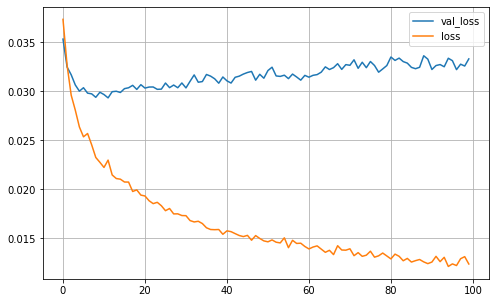

In [122]:
# show the learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [123]:
neural_network_path = "files/final_models/" + "lstmatt_"+ emotion + ".h5"

neural_network_path

'files/final_models/lstmatt_whole.h5'

In [124]:
model.save(neural_network_path)

In [125]:
from keras.models import load_model
# Assuming your model includes instance of an "AttentionLayer" class
model1 = load_model(neural_network_path, custom_objects=SeqWeightedAttention.get_custom_objects())

# 4. Compare the Performance and Training Time Results

In [126]:
trainingtime

,Classifier,Training Time(Seconds)
0,LSTM-Attention,649.06


In [127]:
trainingtime.to_csv("training_time_lstmatt_"+emotion+".csv",mode='w')

In [128]:
all_score = pd.DataFrame(data = [score1], columns = ['pears-corr','spear-corr','pears-corr-range-05-1','spear-corr-range-05-1'],\
             index = ['LSTM-Attention'])
all_score

,pears-corr,spear-corr,pears-corr-range-05-1,spear-corr-range-05-1
LSTM-Attention,0.505625,0.497404,0.416713,0.406063


In [129]:
all_score.to_csv('score_lstmatt_'+emotion+'.csv',mode='w')